<a href="https://colab.research.google.com/github/userfromdarkside/DataScience/blob/main/Machine_Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# link dataset: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('predictive_maintenance.csv')
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [24]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [25]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [26]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [27]:
df = df.drop(['UDI','Product ID'], axis =1) # remove ID columns

In [28]:
mapping_Type = {
    'L':0,
    'M':1,
    'H':2
}
mapping_Failure_Type = {
    'No Failure':0,
    'Power Failure':1,
    'Tool Wear Failure':2,
    'Overstrain Failure':3,
    'Random Failures':4,
    'Heat Dissipation Failure':5
}

In [29]:
# covert columns to be numeric
df['Type'] = df['Type'].replace(mapping_Type).infer_objects()
df['Failure Type'] = df['Failure Type'].replace(mapping_Failure_Type).infer_objects()

<ipython-input-29-579635273936>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'] = df['Type'].replace(mapping_Type).infer_objects()
<ipython-input-29-579635273936>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Failure Type'] = df['Failure Type'].replace(mapping_Failure_Type).infer_objects()


<Axes: >

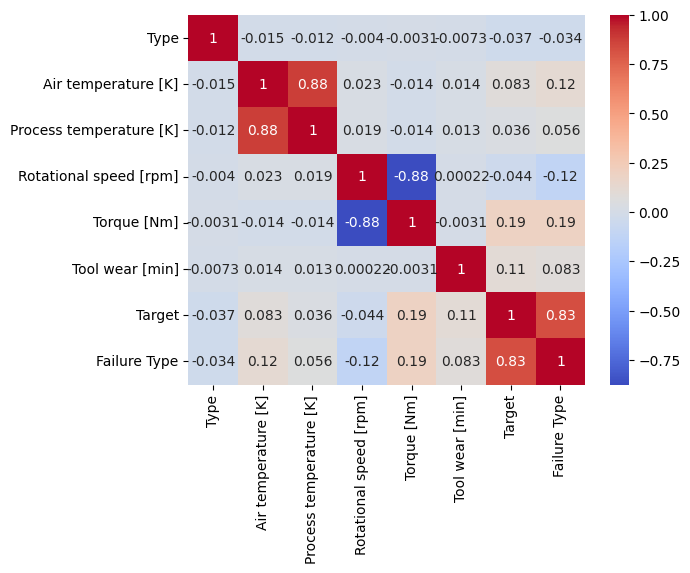

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') # to see the corrolation between these features

In [41]:
def plot_hist(column):
  plt.figure(figsize=(10,6))
  plt.hist(df[column], bins = 50)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [39]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

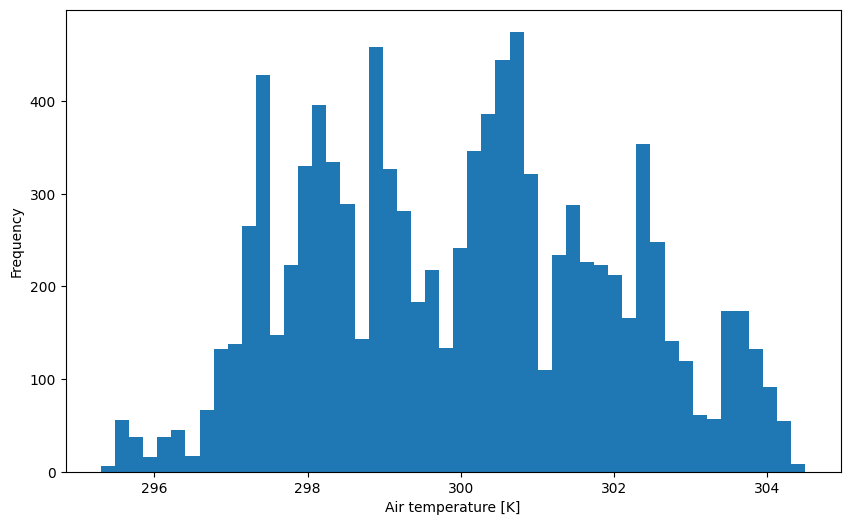

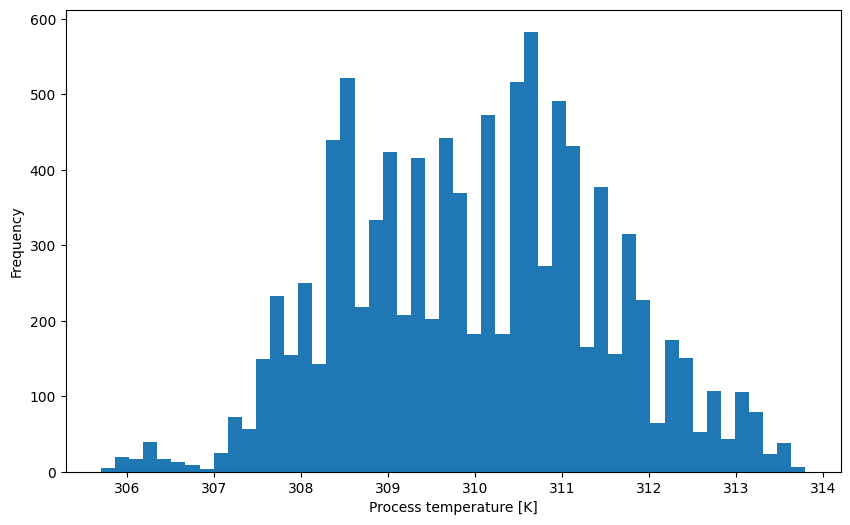

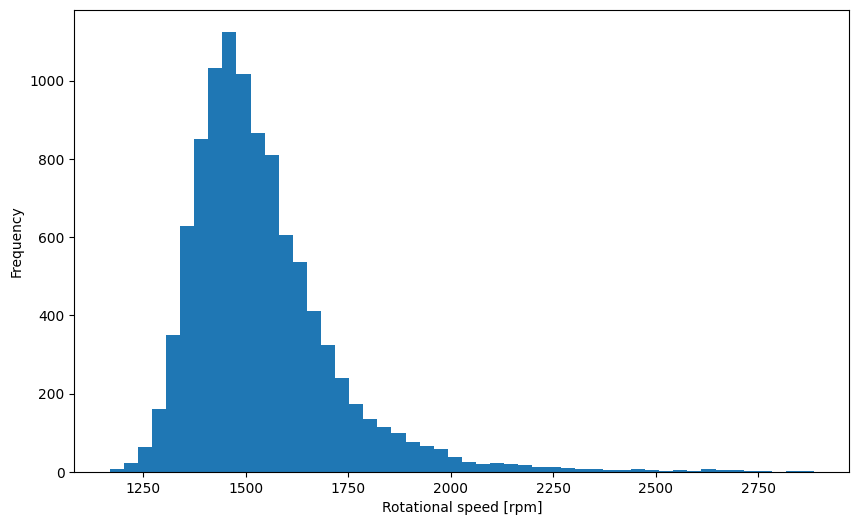

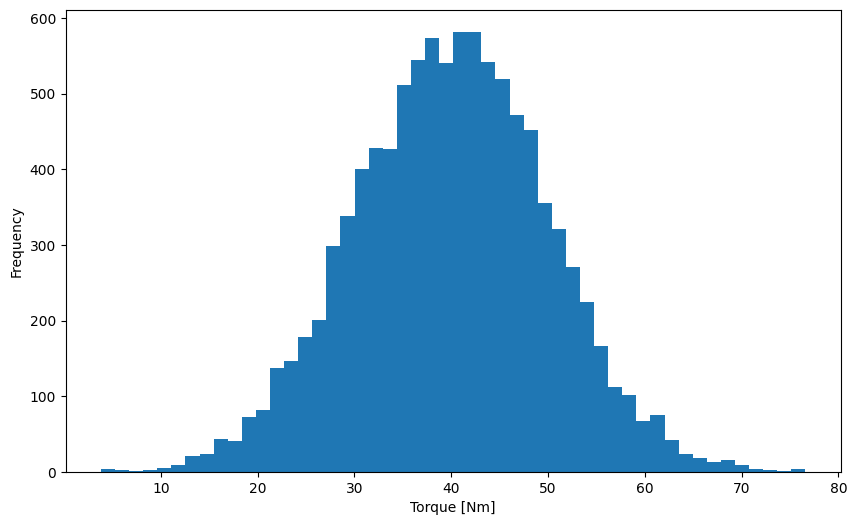

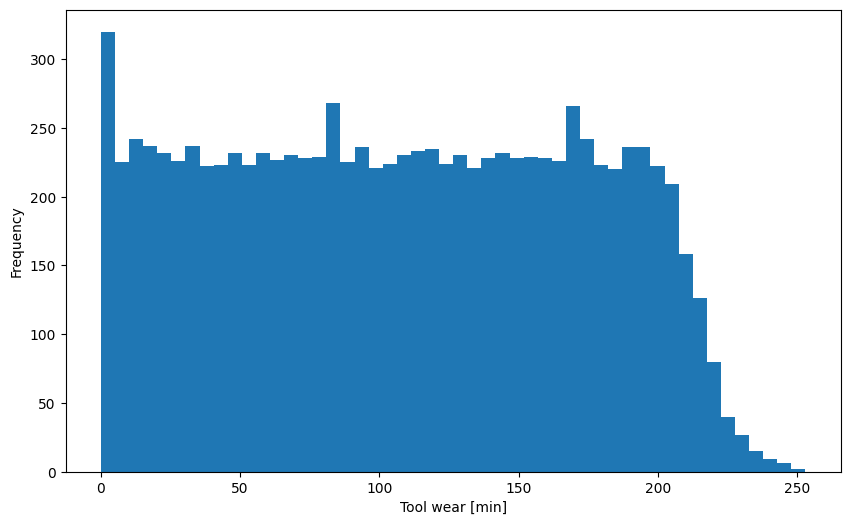

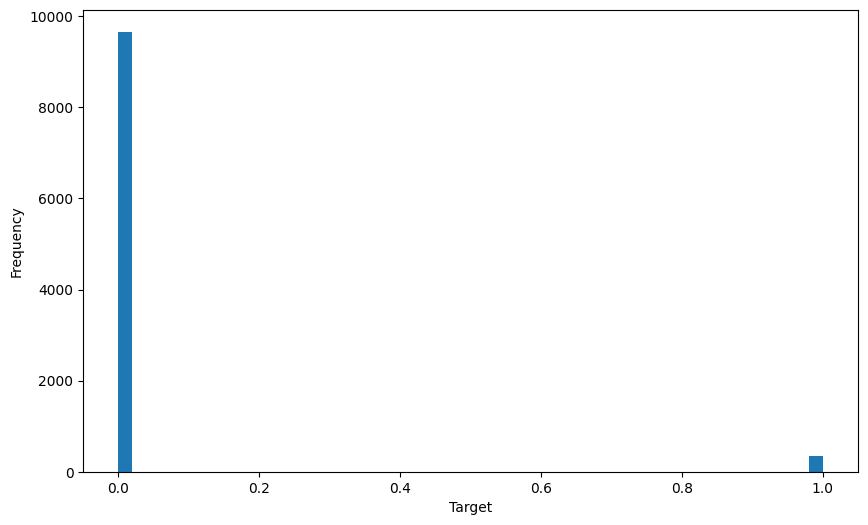

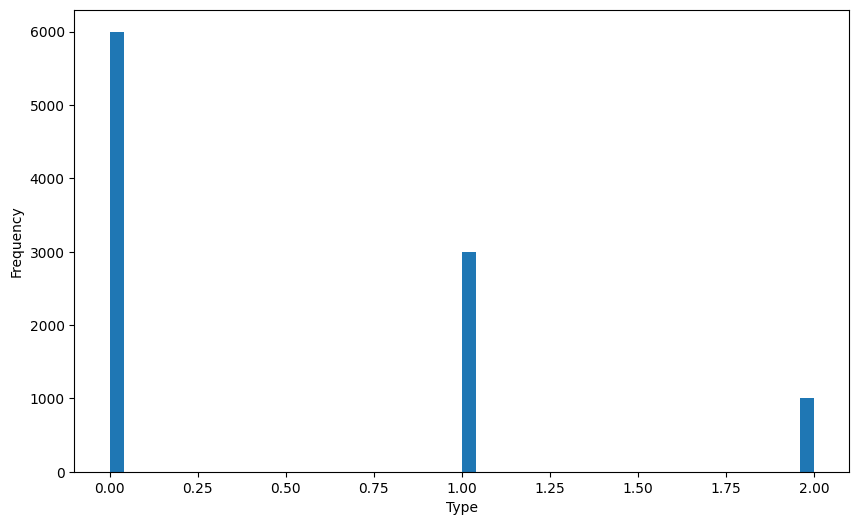

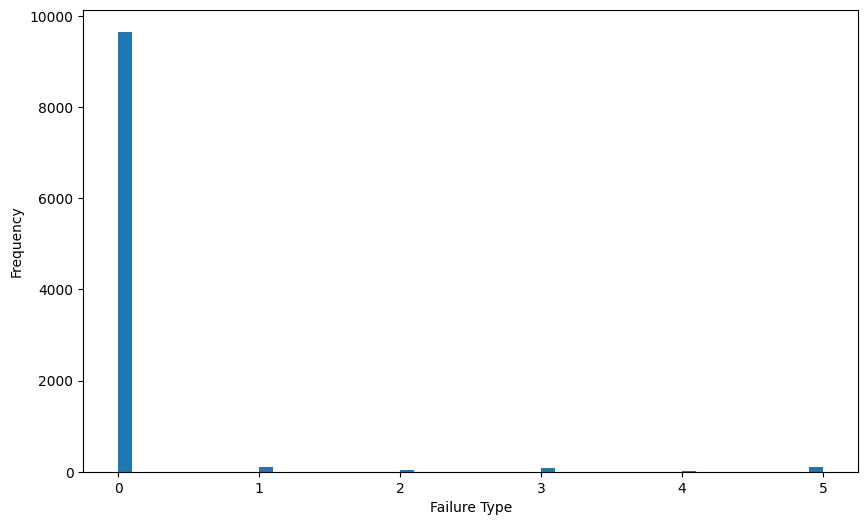

In [45]:
columns = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target','Type', 'Failure Type']
for column in columns:
  plot_hist(column)

In [51]:
# detect and remove outliers using z-score
def removed_outliers(dataset, column, threshold=3):
  mean = np.mean(dataset[column])
  std_dev = np.std(dataset[column])
  dataset['z_score'] = (dataset[column] - mean) / std_dev
  outliers = dataset[np.abs(dataset['z_score']) > threshold]
  print('Outliers detected', outliers)
  processed_dataset = dataset[np.abs(dataset['z_score']) <= threshold].drop('z_score', axis=1)
  return processed_dataset

In [52]:
list_columns = [ 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for col in list_columns:
  df = removed_outliers(df, col)

Outliers detected Empty DataFrame
Columns: [Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type, z_score]
Index: []
Outliers detected Empty DataFrame
Columns: [Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type, z_score]
Index: []
Outliers detected       Type  Air temperature [K]  Process temperature [K]  \
50       0                298.9                    309.1   
194      1                298.2                    308.5   
298      2                297.9                    308.5   
305      0                297.8                    308.4   
344      1                297.5                    308.2   
...    ...                  ...                      ...   
9758     0                298.6                    309.8   
9832     0                298.4                    309.2   
9849     0                298.6                    309.4   


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9815 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9815 non-null   int64  
 1   Air temperature [K]      9815 non-null   float64
 2   Process temperature [K]  9815 non-null   float64
 3   Rotational speed [rpm]   9815 non-null   int64  
 4   Torque [Nm]              9815 non-null   float64
 5   Tool wear [min]          9815 non-null   int64  
 6   Target                   9815 non-null   int64  
 7   Failure Type             9815 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 690.1 KB


In [57]:
# percentage of dataset is removed as outliers
percent = (10000-9815)/10000*100
print(percent,'%')

1.8499999999999999 %


In [61]:
x_df = df.drop(['Target','Failure Type'], axis=1)
y_df = df['Failure Type']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x_df,y_df, test_size=0.15,
                    random_state=42,stratify=y_df)

In [66]:
# scale df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [67]:
# handle unbalanced df
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_sampled, y_train_sampled = smote.fit_resample(x_train,y_train)

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train_sampled, y_train_sampled)

RandomForestClassifier(random_state=42)

In [70]:
parametes_dist = {
    'class_weight': ['balanced', {0:1, 1:10, 2:10, 3:10, 4:10, 5:10}],
    'n_estimators': [50,100,200],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,5,10]
}

In [71]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = parametes_dist,
    n_iter = 10,
    scoring = 'f1_macro',
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

In [72]:
from sklearn.metrics import classification_report
random_search.fit(x_train_sampled,y_train_sampled)
y_pred = random_search.predict(x_test)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1429
           1       0.55      1.00      0.71         6
           2       0.08      0.33      0.13         6
           3       0.78      0.58      0.67        12
           4       0.01      0.33      0.02         3
           5       0.74      0.82      0.78        17

    accuracy                           0.90      1473
   macro avg       0.52      0.66      0.54      1473
weighted avg       0.98      0.90      0.94      1473



Give neural network a try

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
# define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_sampled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [86]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(x_train_sampled, y_train_sampled, epochs=100, batch_size=32, validation_split=0.2,
                 class_weight = {0: 1, 1: 5, 2: 50, 3: 10, 4: 50, 5: 10},
                 callbacks=[early_stop])

Epoch 1/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0736 - val_accuracy: 0.9904 - val_loss: 0.0489
Epoch 2/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0512 - val_accuracy: 0.9988 - val_loss: 0.0274
Epoch 3/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9932 - loss: 0.0381 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9911 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 5/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9920 - loss: 0.0538 - val_accuracy: 0.9757 - val_loss: 0.1058
Epoch 6/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9907 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 7/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0

In [87]:
test_loss, test_acsuracy = model.evaluate(x_test,y_test)
print('Test accuracy:', test_acsuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9609 - loss: 0.3621
Test accuracy: 0.9551934599876404


In [88]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1429
           1       0.71      0.83      0.77         6
           2       0.16      0.50      0.24         6
           3       0.71      0.83      0.77        12
           4       0.00      0.00      0.00         3
           5       0.79      0.88      0.83        17

    accuracy                           0.96      1473
   macro avg       0.56      0.67      0.60      1473
weighted avg       0.98      0.96      0.97      1473



Ok, the second model is much better but still struggling on group 2 and 4. let's fix the class weight